In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
df = pd.read_csv("../data/netflix_titles.csv")

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

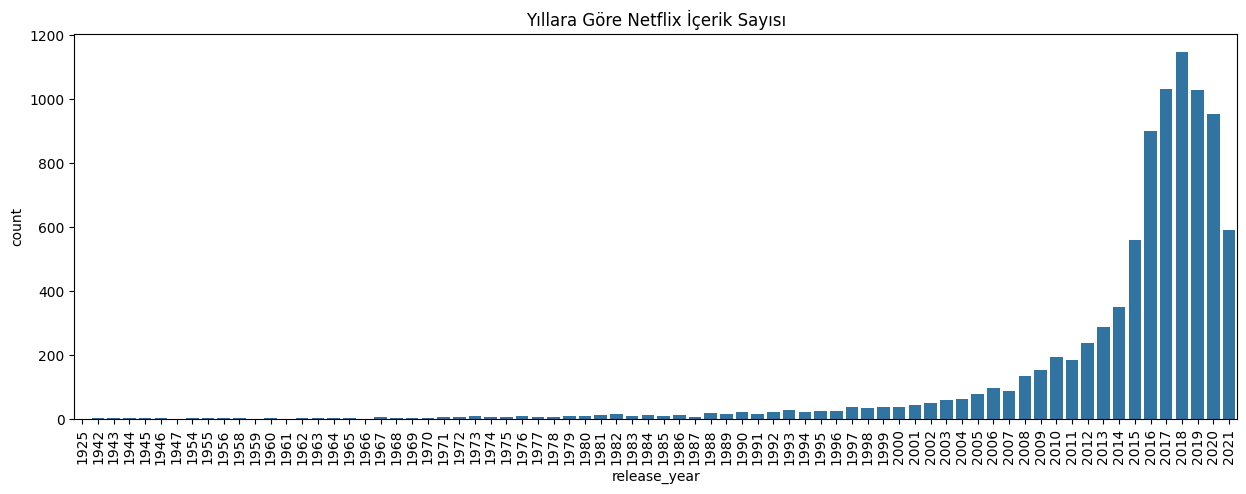

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = "release_year")
plt.xticks(rotation =90)
plt.title("Yıllara Göre Netflix İçerik Sayısı")
plt.show()

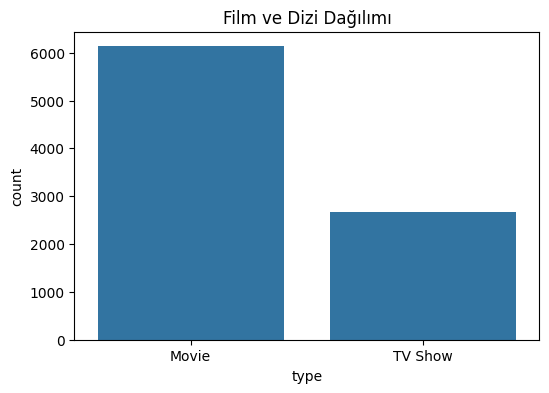

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x ="type")
plt.title("Film ve Dizi Dağılımı")
plt.show()

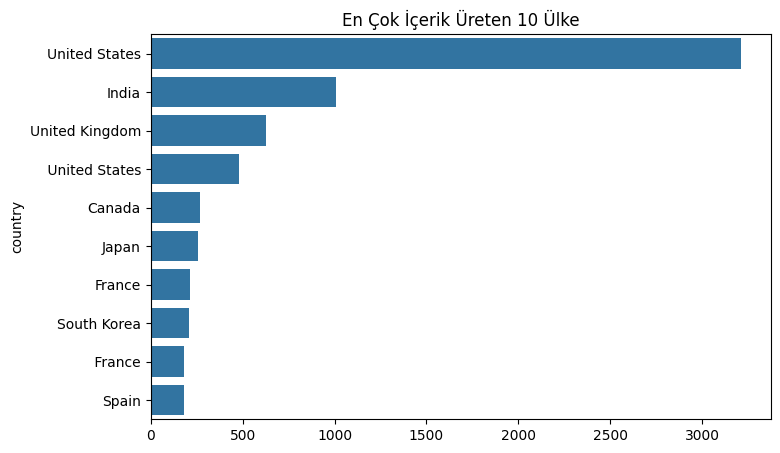

In [29]:
top_countries = df["country"].dropna().str.split(",").explode().value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y = top_countries.index)
plt.title("En Çok İçerik Üreten 10 Ülke")
plt.show()

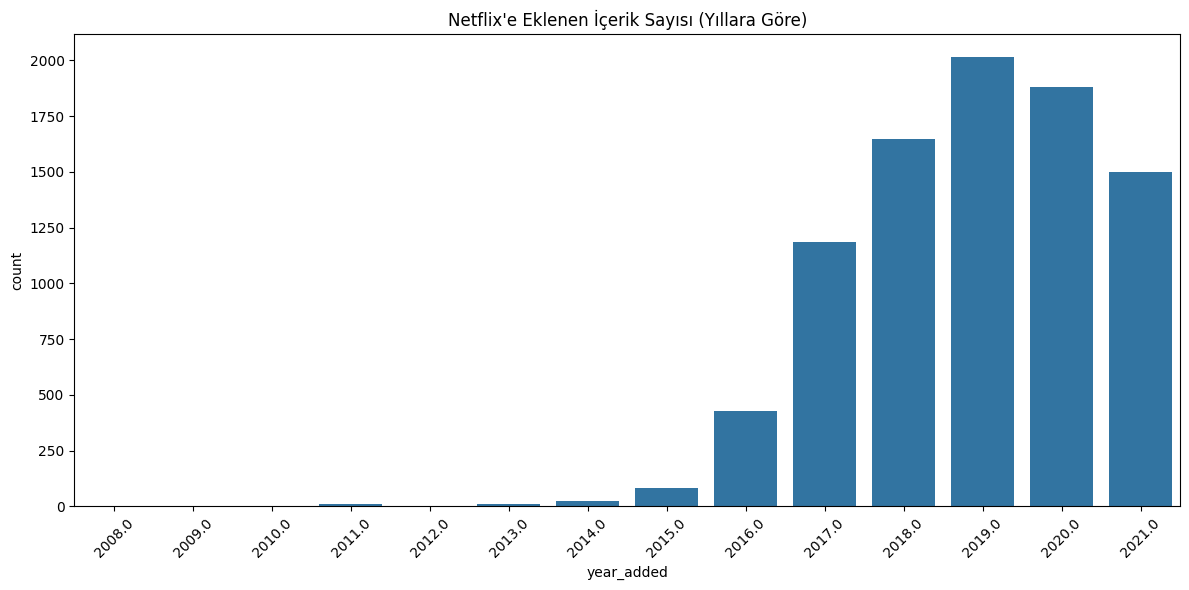

In [30]:
df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year_added", order=sorted(df['year_added'].dropna().unique()))
plt.title("Netflix'e Eklenen İçerik Sayısı (Yıllara Göre)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

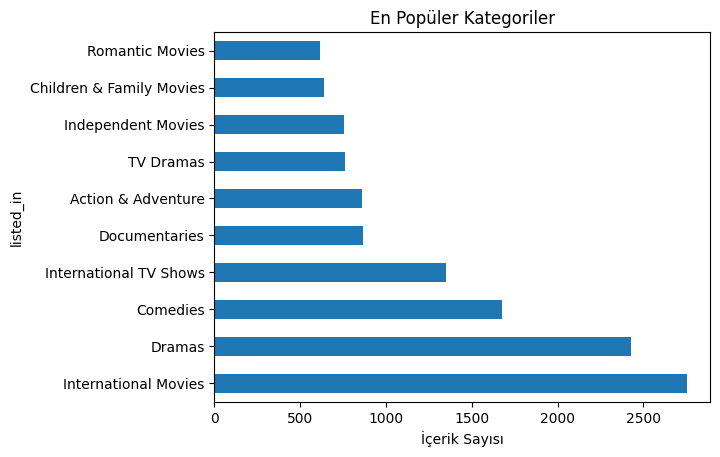

In [31]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh')
plt.title("En Popüler Kategoriler")
plt.xlabel('İçerik Sayısı')
plt.show()

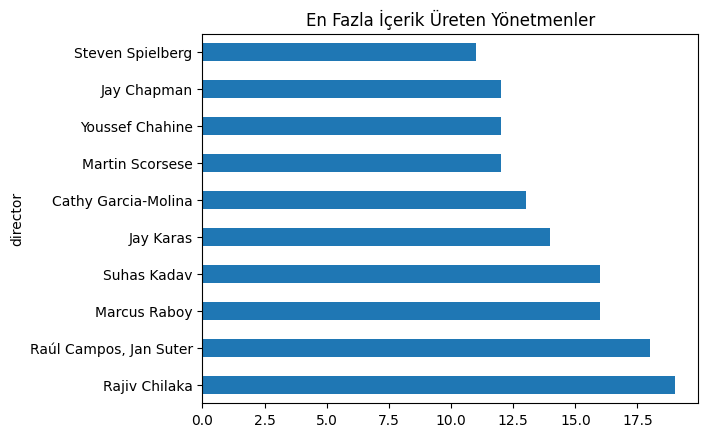

In [32]:
df['director'].value_counts().head(10).plot(kind='barh')
plt.title("En Fazla İçerik Üreten Yönetmenler")
plt.show()

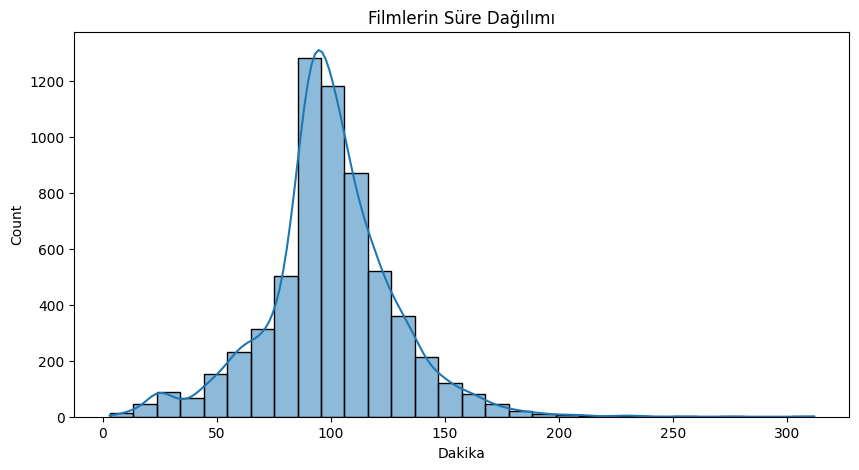

In [33]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movies['duration'], bins=30, kde=True)
plt.title("Filmlerin Süre Dağılımı")
plt.xlabel("Dakika")
plt.show()

Netflix’teki filmlerin büyük çoğunluğu 90 ila 120 dakika aralığındadır. Kısa filmler azınlıkta kalmaktadır. Bu da platformun sinema standardına yakın sürelerde içerik üretmeyi tercih ettiğini göstermektedir.

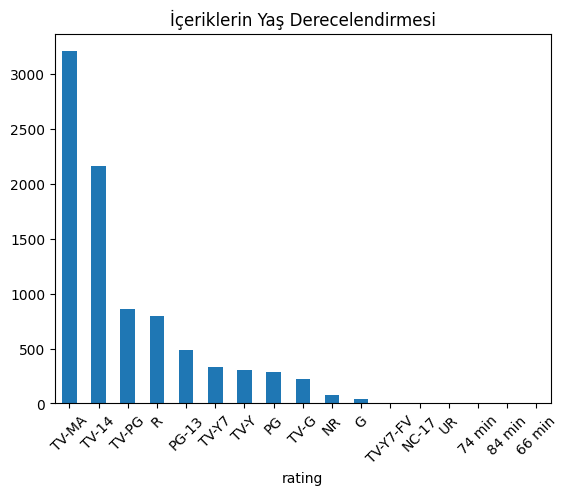

In [34]:
df['rating'].value_counts().plot(kind='bar')
plt.title("İçeriklerin Yaş Derecelendirmesi")
plt.xticks(rotation=45)
plt.show()

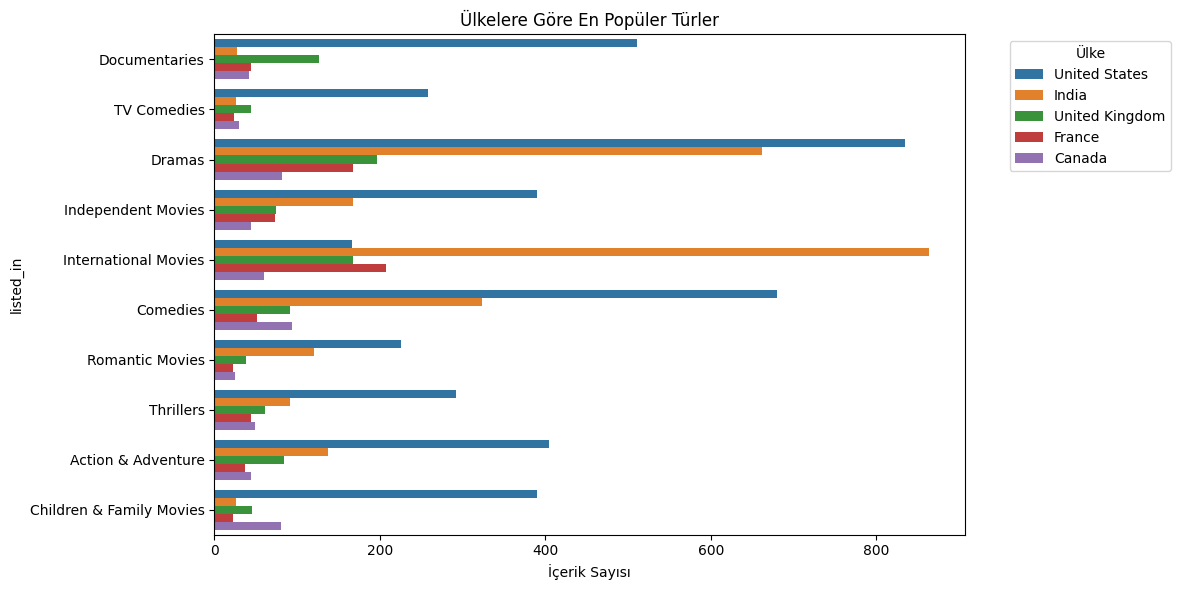

In [36]:
# Eksik olmayan 'country' ve 'listed_in' satırlarını al
df_country = df.dropna(subset=['country', 'listed_in']).copy()

# Virgülle ayrılmış stringleri listeye çevir
df_country['country'] = df_country['country'].str.split(', ')
df_country['listed_in'] = df_country['listed_in'].str.split(', ')

# Listeyi satırlara ayır
df_exploded = df_country.explode('country').explode('listed_in')

# En çok içeriğe sahip 5 ülkeyi al
top_countries = df_exploded['country'].value_counts().head(5).index

# Sadece bu ülkelerin içeriklerini filtrele
filtered = df_exploded[df_exploded['country'].isin(top_countries)]

# En popüler 10 türü belirle
top_genres = filtered['listed_in'].value_counts().nlargest(10).index

# Sadece bu türleri içeren satırları al
filtered_top = filtered[filtered['listed_in'].isin(top_genres)]

# Grafik çiz
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_top, y='listed_in', hue='country')
plt.title('Ülkelere Göre En Popüler Türler')
plt.xlabel('İçerik Sayısı')
plt.legend(title='Ülke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


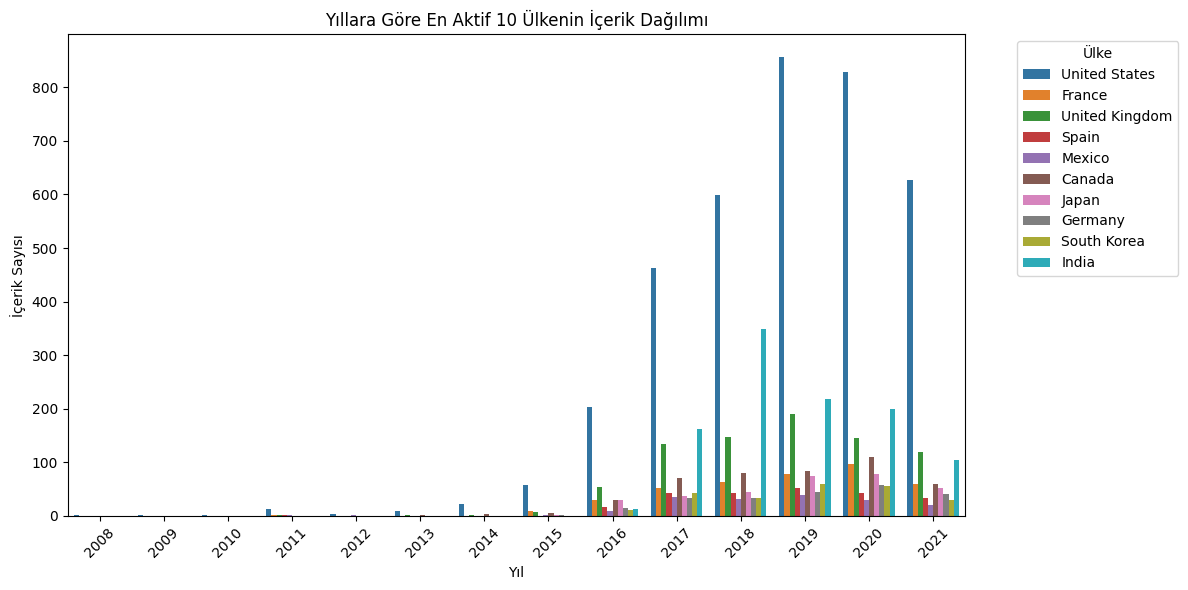

In [37]:
df_year_country = df.dropna(subset=['country', 'date_added']).copy()
df_year_country['year_added'] = pd.to_datetime(df_year_country['date_added']).dt.year
df_year_country['country'] = df_year_country['country'].str.split(', ')
df_exploded = df_year_country.explode('country')

top_10_countries = df_exploded['country'].value_counts().head(10).index
filtered = df_exploded[df_exploded['country'].isin(top_10_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, x='year_added', hue='country')
plt.title('Yıllara Göre En Aktif 10 Ülkenin İçerik Dağılımı')
plt.xlabel("Yıl"); plt.ylabel("İçerik Sayısı")
plt.xticks(rotation=45)
plt.legend(title='Ülke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


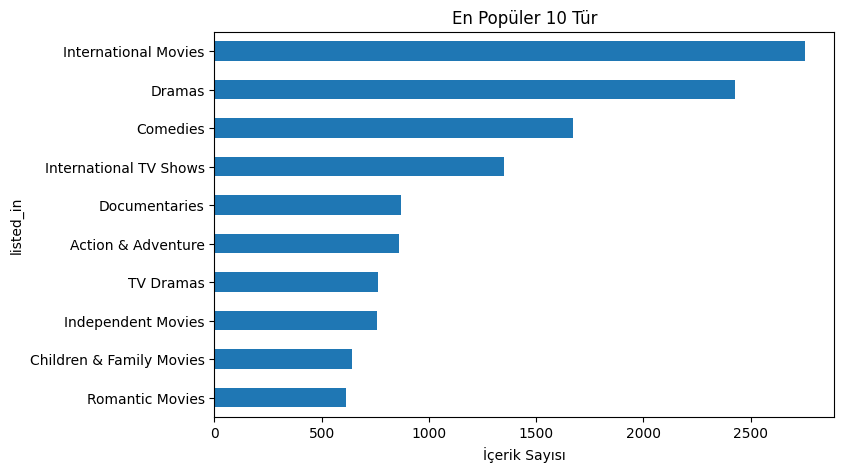

In [38]:
df_genre = df.dropna(subset=['listed_in']).copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_exploded = df_genre.explode('listed_in')

top_genres = df_exploded['listed_in'].value_counts().head(10)
top_genres.plot(kind='barh', title='En Popüler 10 Tür', figsize=(8, 5))
plt.xlabel("İçerik Sayısı")
plt.gca().invert_yaxis()
plt.show()


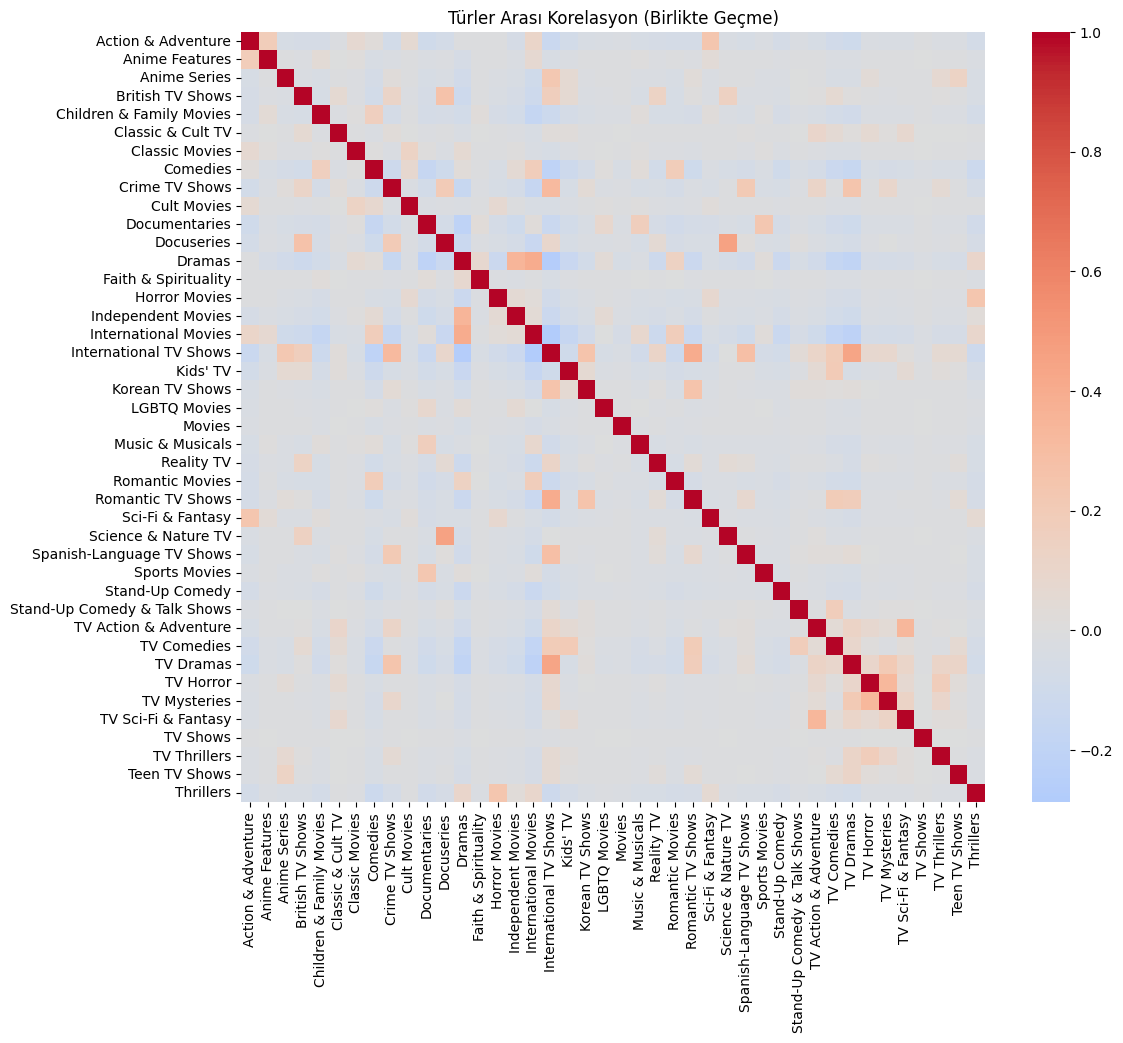

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_genre['listed_in'])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Korelasyon hesapla
corr = genre_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Türler Arası Korelasyon (Birlikte Geçme)')
plt.show()


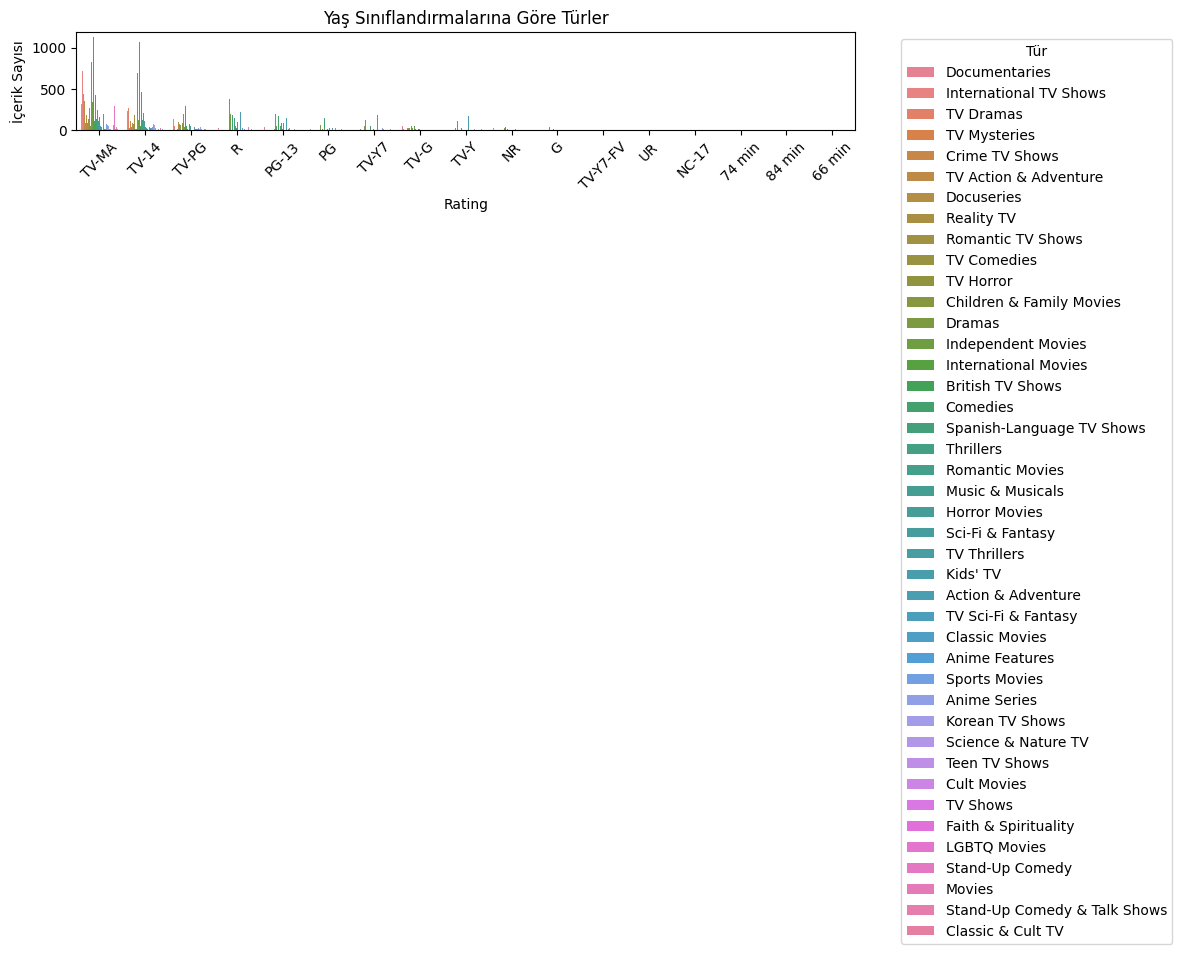

In [40]:
df_rating = df.dropna(subset=['rating', 'listed_in']).copy()
df_rating['listed_in'] = df_rating['listed_in'].str.split(', ')
df_exploded = df_rating.explode('listed_in')

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='rating', order=df_exploded['rating'].value_counts().index, hue='listed_in')
plt.title('Yaş Sınıflandırmalarına Göre Türler')
plt.xlabel('Rating')
plt.ylabel('İçerik Sayısı')
plt.legend(title='Tür', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


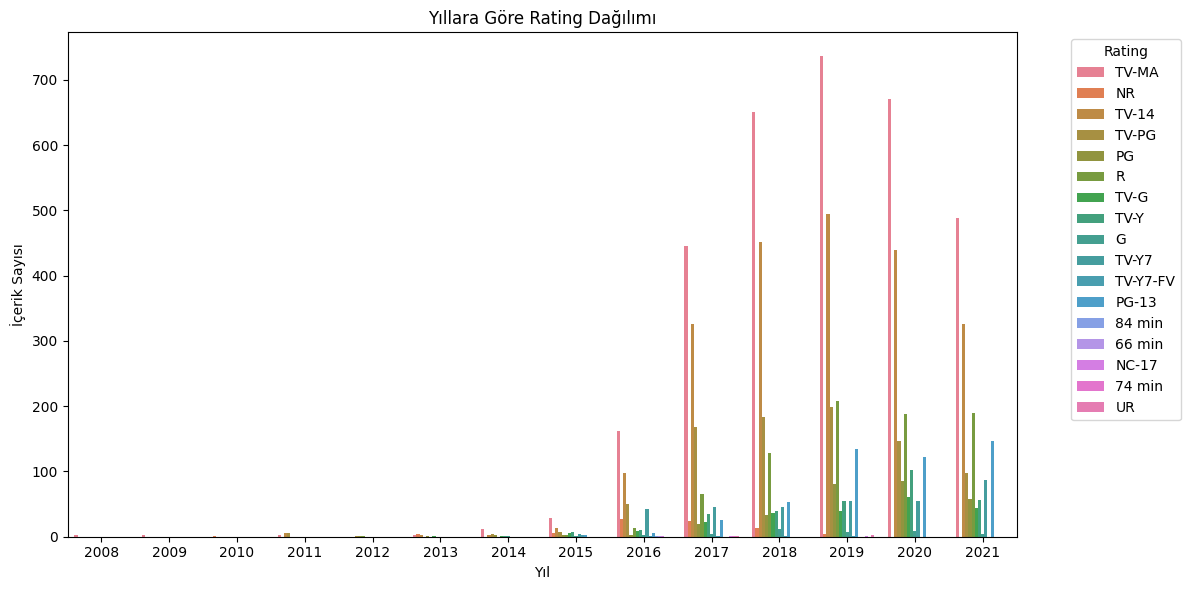

In [41]:
df_ratings_year = df.dropna(subset=['rating', 'date_added']).copy()
df_ratings_year['year_added'] = pd.to_datetime(df_ratings_year['date_added']).dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=df_ratings_year, x='year_added', hue='rating',
              order=sorted(df_ratings_year['year_added'].dropna().unique()))
plt.title('Yıllara Göre Rating Dağılımı')
plt.xlabel("Yıl"); plt.ylabel("İçerik Sayısı")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
